In [1]:
import os
import glob
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Read in data

In [2]:
# Read in daily data
data_path = os.path.join('.', 'data')
daily_data_path = os.path.join(data_path, 'day_approach_maskedID_timeseries.csv')
weekly_data_path = os.path.join(data_path, 'week_approach_maskedID_timeseries.csv')

daily_df = pd.read_csv(daily_data_path)
daily_df.head()

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,nr. sessions.1,total km.1,km Z3-4.1,km Z5-T1-T2.1,km sprinting.1,strength training.1,hours alternative.1,perceived exertion.1,perceived trainingSuccess.1,perceived recovery.1,nr. sessions.2,total km.2,km Z3-4.2,km Z5-T1-T2.2,km sprinting.2,strength training.2,hours alternative.2,perceived exertion.2,perceived trainingSuccess.2,perceived recovery.2,nr. sessions.3,total km.3,km Z3-4.3,km Z5-T1-T2.3,km sprinting.3,strength training.3,hours alternative.3,perceived exertion.3,perceived trainingSuccess.3,perceived recovery.3,nr. sessions.4,total km.4,km Z3-4.4,km Z5-T1-T2.4,km sprinting.4,strength training.4,hours alternative.4,perceived exertion.4,perceived trainingSuccess.4,perceived recovery.4,nr. sessions.5,total km.5,km Z3-4.5,km Z5-T1-T2.5,km sprinting.5,strength training.5,hours alternative.5,perceived exertion.5,perceived trainingSuccess.5,perceived recovery.5,nr. sessions.6,total km.6,km Z3-4.6,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
0,1.0,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.00,0.18,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,1.0,16.4,10.0,0.0,0.0,1.0,0.0,0.11,0.00,0.17,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.10,0.00,0.15,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,1.0,16.4,10.0,0.0,0.0,1.0,0.00,0.11,0.00,0.17,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.10,0.00,0.15,1.0,5.2,0.0,0.5,1.2,0.0,0.0,0.10,0.00,0.17,0,0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,1.0,16.4,10.0,0.0,0.0,1.0,0.00,0.11,0.00,0.17,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.10,0.00,0.15,1.0,5.2,0.0,0.5,1.2,0.0,0.0,0.10,0.00,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,1.0,16.4,10.0,0.0,0.0,1.0,0.00,0.11,0.00,0.17,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.10,0.00,0.15,1.0,5.2,0.0,0.5,1.2,0.0,0.00,0.10,0.00,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.00,0.17,0,0,3
4,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,1.0,16.4,10.0,0.0,0.0,1.0,0.00,0.11,0.00,0.17,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.10,0.00,0.15,1.0,5.2,0.0,0.5,1.2,0.0,0.00,0.10,0.00,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.00,0.17,1.0,17.6,7.2,0.0,0.0,0.0,0.0,0.11,0.00,0.17,0,0,4


In [34]:
# Rename nr. sessions column
daily_df.columns = [x.replace('nr.', 'num') if 'nr.' in x else x for x in daily_df.columns]
daily_df.head()

,num sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,num sessions.1,total km.1,km Z3-4.1,km Z5-T1-T2.1,km sprinting.1,strength training.1,hours alternative.1,perceived exertion.1,perceived trainingSuccess.1,perceived recovery.1,num sessions.2,total km.2,km Z3-4.2,km Z5-T1-T2.2,km sprinting.2,strength training.2,hours alternative.2,perceived exertion.2,perceived trainingSuccess.2,perceived recovery.2,num sessions.3,total km.3,km Z3-4.3,km Z5-T1-T2.3,km sprinting.3,strength training.3,hours alternative.3,perceived exertion.3,perceived trainingSuccess.3,perceived recovery.3,num sessions.4,total km.4,km Z3-4.4,km Z5-T1-T2.4,km sprinting.4,strength training.4,hours alternative.4,perceived exertion.4,perceived trainingSuccess.4,perceived recovery.4,num sessions.5,total km.5,km Z3-4.5,km Z5-T1-T2.5,km sprinting.5,strength training.5,hours alternative.5,perceived exertion.5,perceived trainingSuccess.5,perceived recovery.5,num sessions.6,total km.6,km Z3-4.6,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
0,1.0,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.00,0.18,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,1.0,16.4,10.0,0.0,0.0,1.0,0.0,0.11,0.00,0.17,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.10,0.00,0.15,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,1.0,16.4,10.0,0.0,0.0,1.0,0.00,0.11,0.00,0.17,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.10,0.00,0.15,1.0,5.2,0.0,0.5,1.2,0.0,0.0,0.10,0.00,0.17,0,0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,1.0,16.4,10.0,0.0,0.0,1.0,0.00,0.11,0.00,0.17,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.10,0.00,0.15,1.0,5.2,0.0,0.5,1.2,0.0,0.0,0.10,0.00,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,1.0,16.4,10.0,0.0,0.0,1.0,0.00,0.11,0.00,0.17,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.10,0.00,0.15,1.0,5.2,0.0,0.5,1.2,0.0,0.00,0.10,0.00,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.00,0.17,0,0,3
4,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,1.0,16.4,10.0,0.0,0.0,1.0,0.00,0.11,0.00,0.17,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.10,0.00,0.15,1.0,5.2,0.0,0.5,1.2,0.0,0.00,0.10,0.00,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.00,0.17,1.0,17.6,7.2,0.0,0.0,0.0,0.0,0.11,0.00,0.17,0,0,4


In [35]:
# Check for NaNs
daily_df.isnull().sum()

num sessions                   0
total km                       0
km Z3-4                        0
km Z5-T1-T2                    0
km sprinting                   0
strength training              0
hours alternative              0
perceived exertion             0
perceived trainingSuccess      0
perceived recovery             0
num sessions.1                 0
total km.1                     0
km Z3-4.1                      0
km Z5-T1-T2.1                  0
km sprinting.1                 0
strength training.1            0
hours alternative.1            0
perceived exertion.1           0
perceived trainingSuccess.1    0
perceived recovery.1           0
num sessions.2                 0
total km.2                     0
km Z3-4.2                      0
km Z5-T1-T2.2                  0
km sprinting.2                 0
strength training.2            0
hours alternative.2            0
perceived exertion.2           0
perceived trainingSuccess.2    0
perceived recovery.2           0
num sessio

In [36]:
# Describe columns of data
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42766 entries, 0 to 42765
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   num sessions                 42766 non-null  float64
 1   total km                     42766 non-null  float64
 2   km Z3-4                      42766 non-null  float64
 3   km Z5-T1-T2                  42766 non-null  float64
 4   km sprinting                 42766 non-null  float64
 5   strength training            42766 non-null  float64
 6   hours alternative            42766 non-null  float64
 7   perceived exertion           42766 non-null  float64
 8   perceived trainingSuccess    42766 non-null  float64
 9   perceived recovery           42766 non-null  float64
 10  num sessions.1               42766 non-null  float64
 11  total km.1                   42766 non-null  float64
 12  km Z3-4.1                    42766 non-null  float64
 13  km Z5-T1-T2.1   

## Describe data

In [37]:
daily_df.describe()

,num sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,num sessions.1,total km.1,km Z3-4.1,km Z5-T1-T2.1,km sprinting.1,strength training.1,hours alternative.1,perceived exertion.1,perceived trainingSuccess.1,perceived recovery.1,num sessions.2,total km.2,km Z3-4.2,km Z5-T1-T2.2,km sprinting.2,strength training.2,hours alternative.2,perceived exertion.2,perceived trainingSuccess.2,perceived recovery.2,num sessions.3,total km.3,km Z3-4.3,km Z5-T1-T2.3,km sprinting.3,strength training.3,hours alternative.3,perceived exertion.3,perceived trainingSuccess.3,perceived recovery.3,num sessions.4,total km.4,km Z3-4.4,km Z5-T1-T2.4,km sprinting.4,strength training.4,hours alternative.4,perceived exertion.4,perceived trainingSuccess.4,perceived recovery.4,num sessions.5,total km.5,km Z3-4.5,km Z5-T1-T2.5,km sprinting.5,strength training.5,hours alternative.5,perceived exertion.5,perceived trainingSuccess.5,perceived recovery.5,num sessions.6,total km.6,km Z3-4.6,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
count,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000
mean,0.829561,7.038187,0.691381,0.579930,0.073016,0.116237,0.163492,0.247788,0.349802,0.195898,0.829000,7.024199,0.689436,0.574926,0.072614,0.117126,0.164331,0.247228,0.349327,0.195780,0.829561,7.039143,0.695195,0.578438,0.073135,0.116518,0.163359,0.247726,0.349382,0.196104,0.829280,7.039936,0.692611,0.578181,0.072693,0.116307,0.162977,0.247664,0.349609,0.196164,0.829865,7.042934,0.695447,0.577788,0.072167,0.116214,0.162675,0.247642,0.349797,0.196250,0.828766,7.054684,0.697388,0.580073,0.072303,0.115886,0.161330,0.247697,0.349669,0.196298,0.828813,7.051319,0.695031,0.580347,0.072595,0.116120,0.162308,0.247550,0.349503,0.196224,34.550858,0.013632,1228.039892
std,0.580696,7.473216,2.317657,1.811938,0.483480,0.326010,0.549664,0.257262,0.368300,0.190321,0.581215,7.473041,2.310966,1.805558,0.484186,0.327197,0.552471,0.256781,0.368236,0.190313,0.580736,7.470759,2.328649,1.808320,0.485633,0.326699,0.550724,0.257149,0.368063,0.190505,0.580533,7.464805,2.315000,1.810760,0.481981,0.326380,0.548887,0.257077,0.368157,0.190568,0.580321,7.461837,2.324751,1.807505,0.479745,0.326270,0.546884,0.256785,0.368123,0.190499,0.579696,7.470514,2.327571,1.811543,0.487074,0.325741,0.544333,0.256950,0.368109,0.190694,0.579951,7.470174,2.323844,1.814538,0.483691,0.326016,0.554031,0.256718,0.368042,0.190568,19.050033,0.115960,807.021168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,0.000000,0.000000

<AxesSubplot:xlabel='injury', ylabel='counts'>

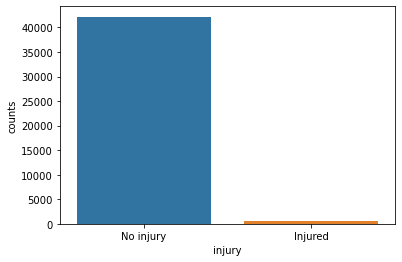

In [38]:
# Look at injury value counts
injuries = daily_df['injury'].value_counts().reset_index().rename(columns={'index':'injury', 'injury':'counts'})
injuries['injury'] = injuries['injury'].map({0: 'No injury', 1: 'Injured'})
sns.barplot(x='injury', y='counts', data=injuries)

<AxesSubplot:xlabel='Athlete ID', ylabel='num sessions'>

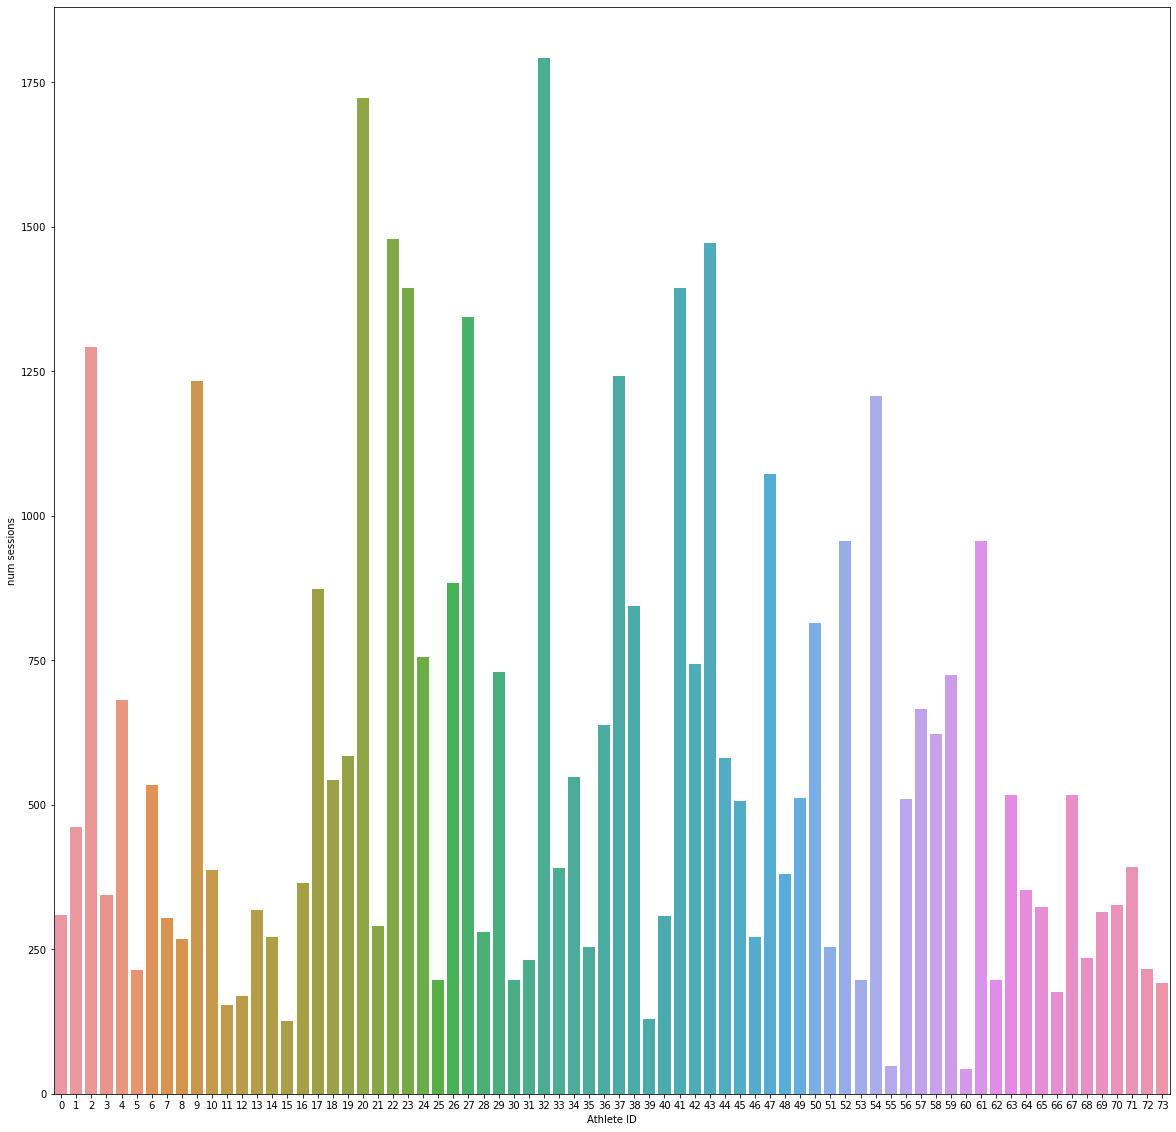

In [39]:
# Look at how many data points per runner
runners = daily_df.groupby('Athlete ID')['num sessions'].agg('count').reset_index()
w, h = 20, 20
fig, ax= plt.subplots(figsize=(w, h))
sns.barplot(x='Athlete ID', y='num sessions', data=runners, ax=ax)

<AxesSubplot:xlabel='num sessions', ylabel='Count'>

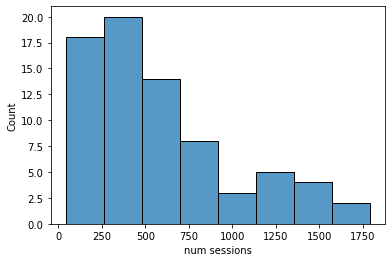

In [40]:
# Make histogram of number of data points per runner
sns.histplot(x='num sessions', data=runners)

## Examine each feature

<AxesSubplot:xlabel='num sessions', ylabel='count'>

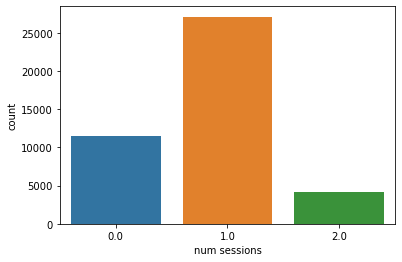

In [41]:
# Plot count plot of number of sessions
sns.countplot(x='num sessions', data=daily_df)

<AxesSubplot:xlabel='total km', ylabel='Count'>

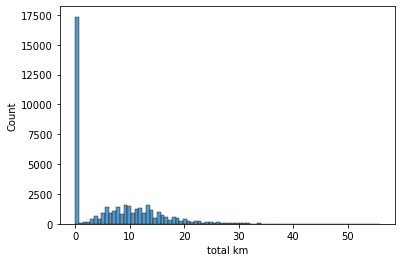

In [42]:
# Plot histogram of total km covered by running
sns.histplot(x='total km', data=daily_df)

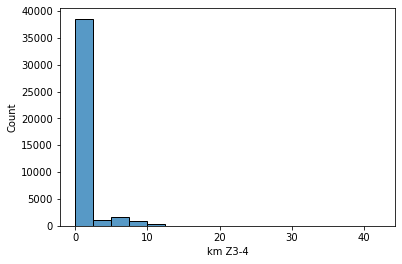

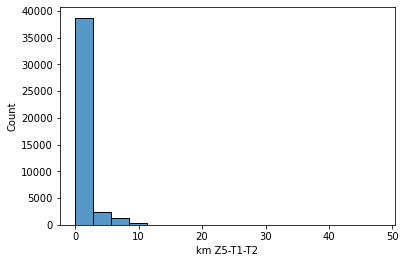

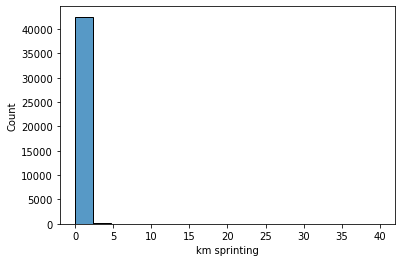

In [43]:
# Plot histograms of km covered in each intensity level (Z3-4, Z5-T1-T2, sprinting)
for c in ['km Z3-4', 'km Z5-T1-T2', 'km sprinting']:
    sns.histplot(x=c, data=daily_df)
    plt.show()

<AxesSubplot:xlabel='strength training', ylabel='count'>

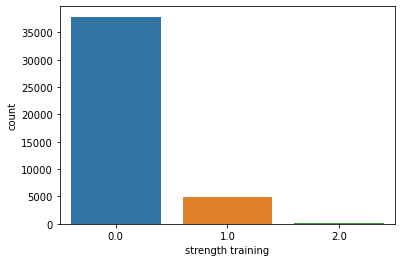

In [44]:
# Count plot of strength training
sns.countplot(x='strength training', data=daily_df)

<AxesSubplot:xlabel='hours alternative', ylabel='Count'>

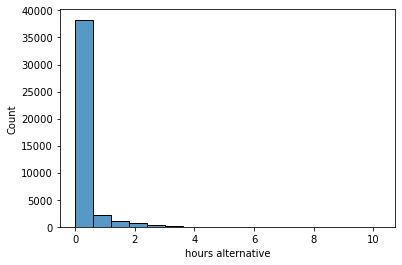

In [45]:
# Number of hours spent on cross training
sns.histplot(x='hours alternative', data=daily_df)

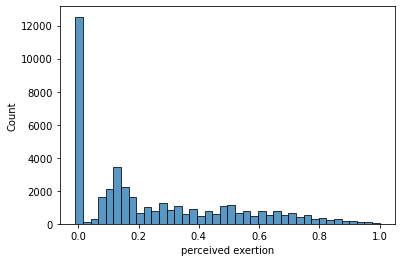

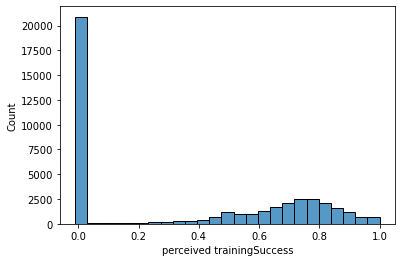

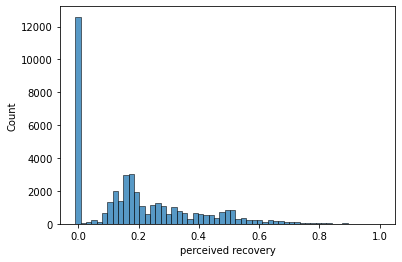

In [46]:
# Histograms of athlete's self-reported exertion, belief of training success, and energy levels of before training
for c in ['exertion', 'trainingSuccess', 'recovery']:
    sns.histplot(x='perceived ' + c, data=daily_df)
    plt.show()

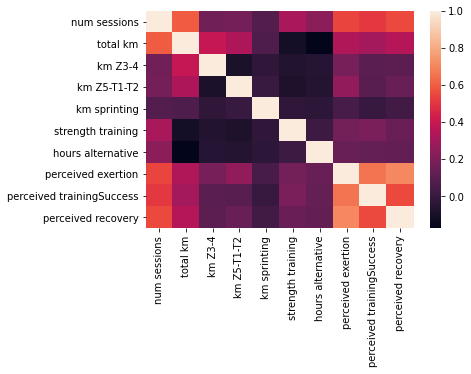

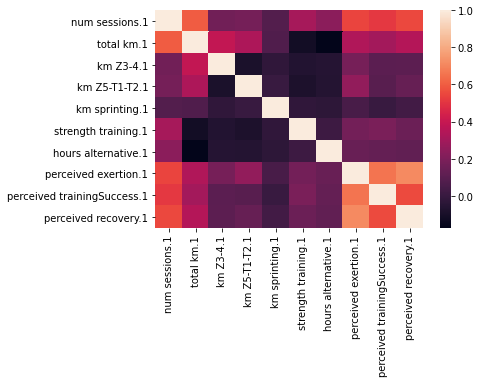

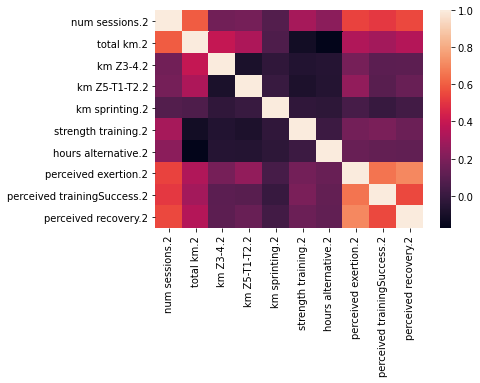

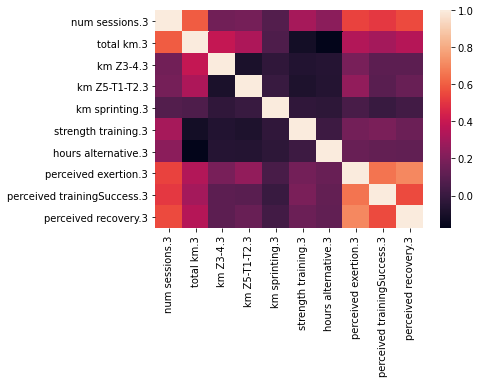

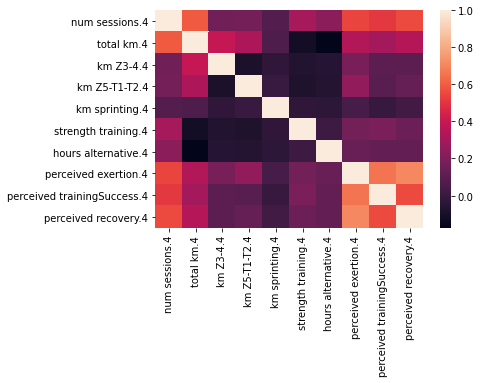

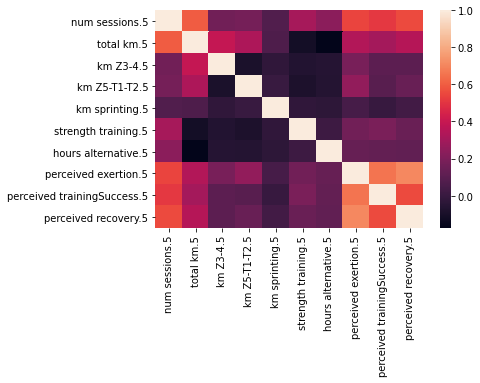

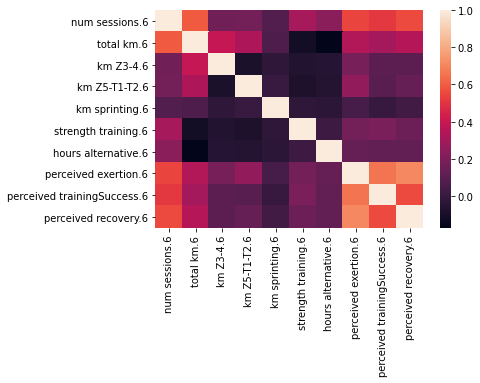

In [47]:
# Create correlation matrix for each training day
features_df = daily_df.drop(columns=['Athlete ID', 'injury', 'Date'])
for i in range(7):
    if i > 0:
        day_cols = [c for c in features_df.columns if c.endswith('.'+str(i))]
    else:
        day_cols = features_df.columns[:10]
    corr_df = features_df[day_cols].corr()
    sns.heatmap(corr_df)
    plt.show()

## Feature relationships

In [48]:
feats_stripped

Index(['nr. sessions', 'total km', 'km Z3-4', 'km Z5-T1-T2', 'km sprinting', 'strength training', 'hours alternative', 'perceived exertion', 'perceived trainingSuccess', 'perceived recovery'], dtype='object')

In [51]:
len('num sessions'.rsplit('.'))

1

In [54]:
feats_stripped

Index(['num sessions', 'total km', 'km Z3-4', 'km Z5-T1-T2', 'km sprinting', 'strength training', 'hours alternative', 'perceived exertion', 'perceived trainingSuccess', 'perceived recovery'], dtype='object')

num sessions


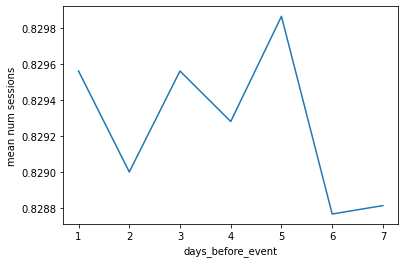

total km


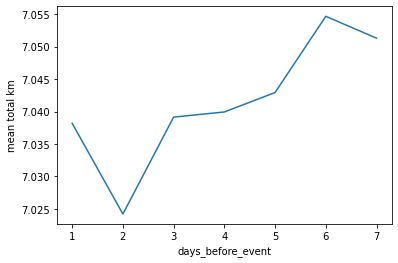

km Z3-4


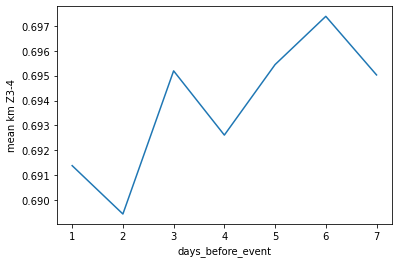

km Z5-T1-T2


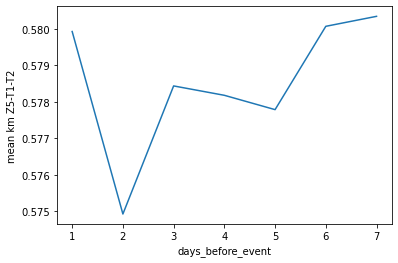

km sprinting


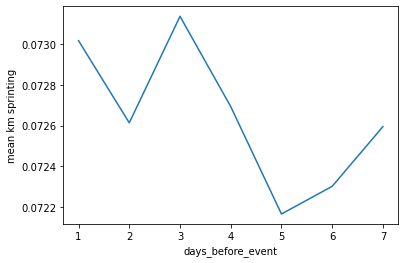

strength training


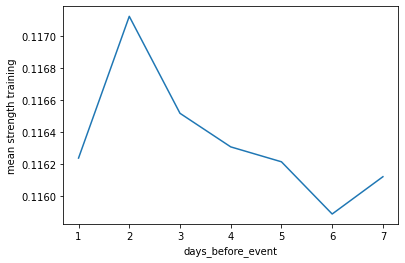

hours alternative


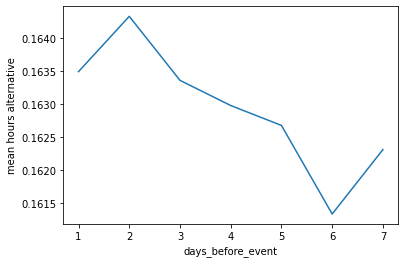

perceived exertion


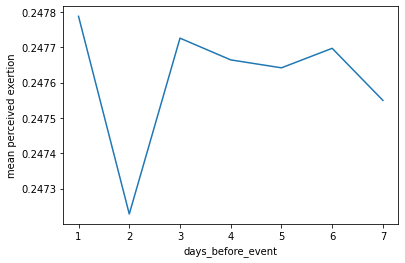

perceived trainingSuccess


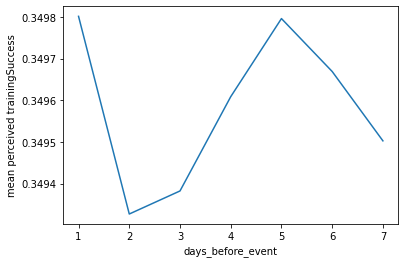

perceived recovery


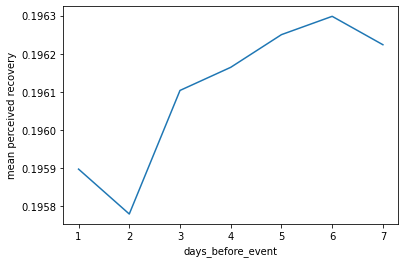

In [56]:
# Identify any trends in the features as the number of days before the event decreases
feats_stripped = daily_df.columns[:10]
for f in feats_stripped:
    print(f)
    f_cols = [c for c in daily_df.columns if f in c]
    f_data = daily_df[reversed(f_cols)]
    f_data_avgs = f_data.mean(axis=0).reset_index().rename(columns={'index':'days_before_event', 0: f'mean {f}'})
    f_data_avgs['days_before_event'] = f_data_avgs['days_before_event'].map(lambda x: int(x.rsplit('.')[-1]) + 1 if len(x.rsplit('.')) > 1 else 1)
    sns.lineplot(data=f_data_avgs, x='days_before_event', y=f'mean {f}')
    plt.show()

In [57]:
# TODO: Do the runners' perception of their training track well with their injury history?